In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],date_parser=dateparse)
#  index_col='Month'
print(data.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [3]:
data.rename(columns={'Month': 'date', '#Passengers': 'Passengers'},inplace=True)

In [4]:
data

,date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [5]:
data.isna().sum()

date          0
Passengers    0
dtype: int64

In [6]:
final_data= data.copy()

In [7]:
final_data.set_index('date', inplace=True)

In [8]:
final_data.head()

,Passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
final_data.tail()

,Passengers
date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Plotting Data

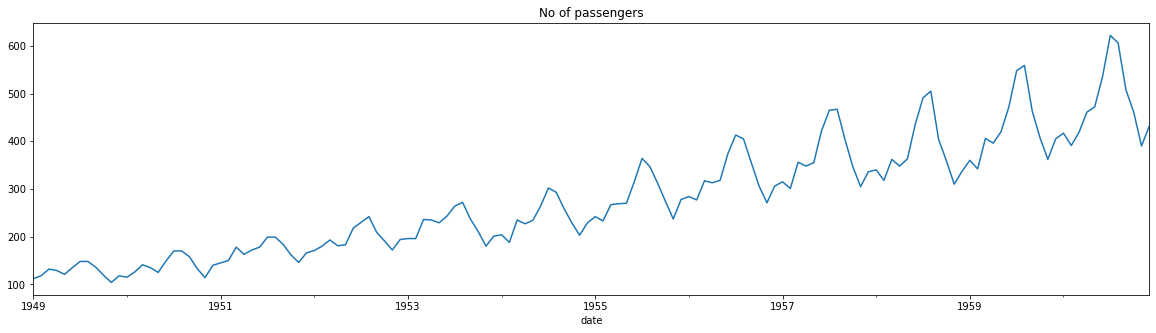

In [10]:
final_data.Passengers.plot(figsize=(20,5), title = "No of passengers")
plt.show()

In [11]:
final_data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### The QQ Plot

In [12]:
import scipy.stats
import pylab


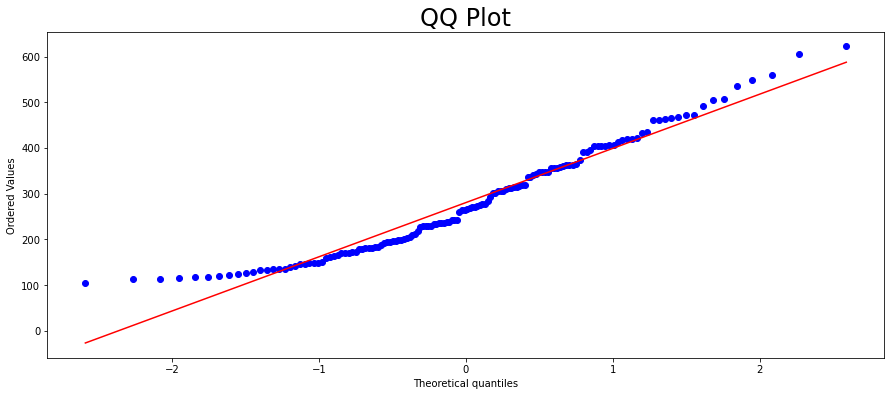

In [13]:
# check data distributed how it fits normal ditribution, take all values and arranges them in order 
# how many standard deviation away from the mean, red line represents pure normal ditribution line

scipy.stats.probplot(final_data.Passengers, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

## confirming trend

Text(0.5, 0, 'Year')

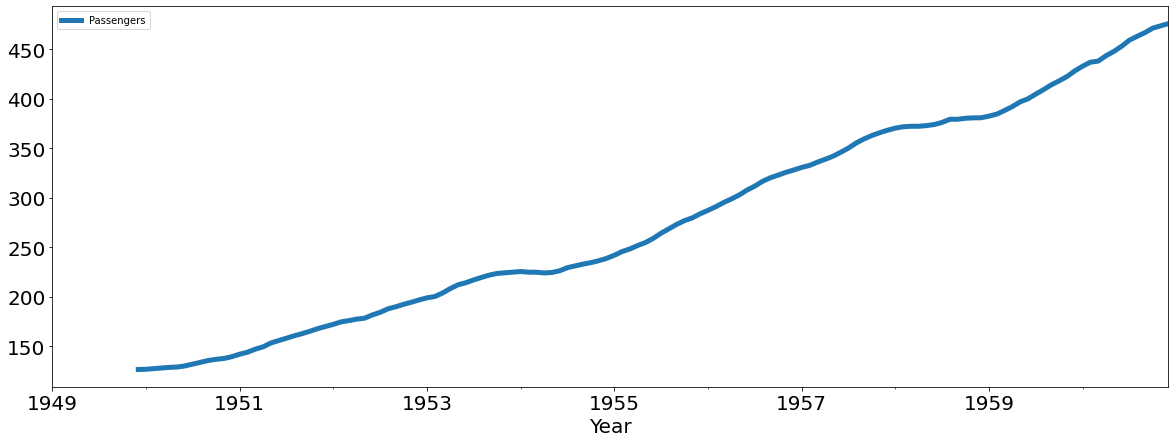

In [14]:
p= final_data[['Passengers']]
p.rolling(12).mean().plot(figsize=(20,7), linewidth= 5, fontsize=20)
plt.xlabel('Year', fontsize=20)

## confirming seasonal

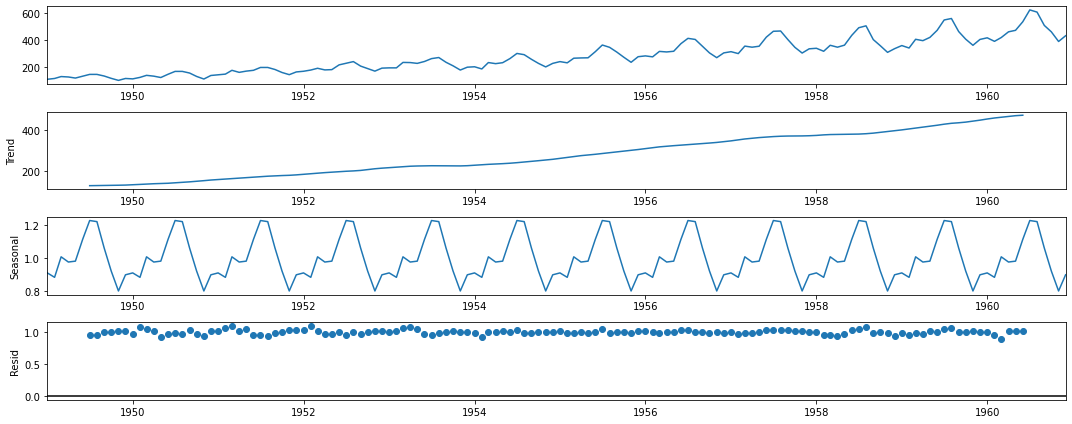

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(final_data, model='multiplicative')
# result = seasonal_decompose(final_data, model='additive')

result.plot()
plt.show()

## Checking stationarity

In [16]:
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt 

In [17]:
adf_stat= sts.adfuller(final_data.Passengers)
print('ADF Statistic: %f' % adf_stat[0])
print('p-value: %f' % adf_stat[1])
print('Critical Values:')
for key, value in adf_stat[4].items():
    print('\t%s: %.3f' % (key, value))


# higher p-value which states it is not stationary data also test stat is more 

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


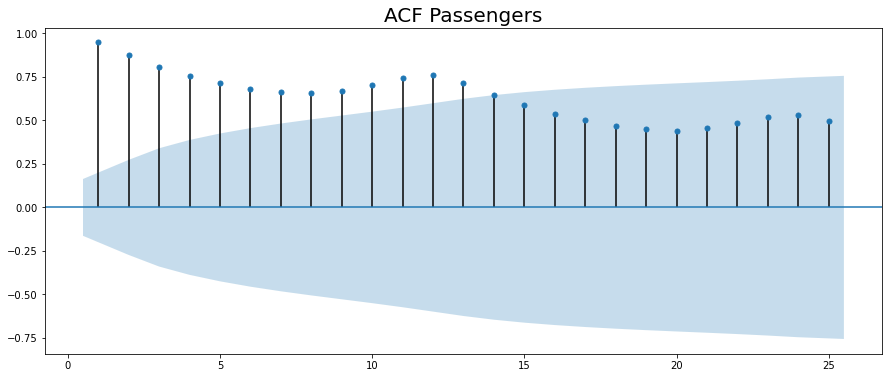

In [18]:
sgt.plot_acf(final_data.Passengers, lags = 25, zero = False)
plt.title("ACF Passengers", size = 20)
plt.show()

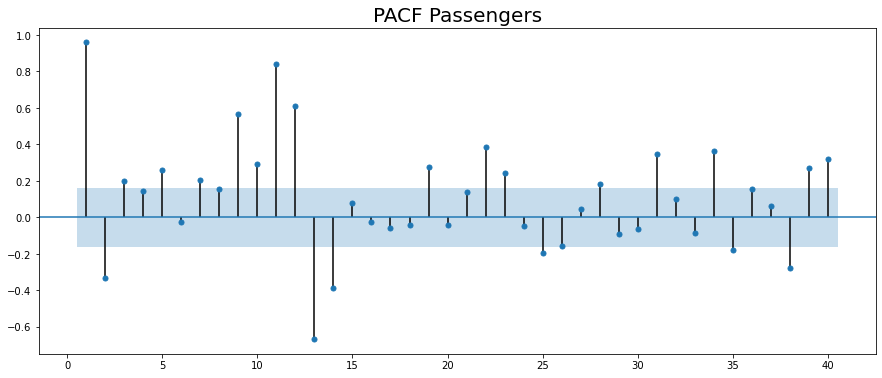

In [19]:
sgt.plot_pacf(final_data.Passengers, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Passengers", size = 20)
plt.show()

# Basic AR Model

In [20]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [21]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

model_ar_1 = ARMA(final_data.Passengers, order=(1,0))

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
results_ar_1 = model_ar_1.fit()
results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -711.090
Method:                       css-mle   S.D. of innovations             33.446
Date:                Wed, 12 May 2021   AIC                           1428.179
Time:                        16:53:35   BIC                           1437.089
Sample:                    01-01-1949   HQIC                          1431.800
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              278.0218     67.025      4.148      0.000     146.655     409.388
ar.L1.Passengers     0.9646      0.021     45.139      0.000       0.923       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0367           +0.0000j            1.0367            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
model_ar_2 = ARMA(final_data.Passengers, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 0)   Log Likelihood                -702.819
Method:                       css-mle   S.D. of innovations             31.558
Date:                Wed, 12 May 2021   AIC                           1413.639
Time:                        16:53:35   BIC                           1425.518
Sample:                    01-01-1949   HQIC                          1418.466
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              280.5022     49.382      5.680      0.000     183.716     377.289
ar.L1.Passengers     1.2831      0.079     16.331      0.000       1.129       1.437
ar.L2.Passengers    -0.3322      0.079     -4.194      0.000      -0.487      -0.177
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0831           +0.0000j            1.0831            0.0000
AR.2            2.7788           +0.0000j            2.7788            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
LLR_test(model_ar_1, model_ar_2)

# not significant >0.05, so we can go to higher lag models

0.0

In [25]:
model_ar_3= ARMA(final_data.Passengers, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(3, 0)   Log Likelihood                -700.171
Method:                       css-mle   S.D. of innovations             30.965
Date:                Wed, 12 May 2021   AIC                           1410.342
Time:                        16:53:35   BIC                           1425.191
Sample:                    01-01-1949   HQIC                          1416.376
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              281.8887     60.380      4.669      0.000     163.545     400.232
ar.L1.Passengers     1.3531      0.083     16.339      0.000       1.191       1.515
ar.L2.Passengers    -0.5877      0.135     -4.367      0.000      -0.851      -0.324
ar.L3.Passengers     0.1968      0.085      2.326      0.020       0.031       0.363
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0491           -0.0000j            1.0491           -0.0000
AR.2            0.9682           -1.9761j            2.2005           -0.1775
AR.3            0.9682           +1.9761j            2.2005            0.1775
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(model_ar_2, model_ar_3)

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.021

In [27]:
model_ar_4= ARMA(final_data.Passengers, order=(4,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_3, model_ar_4)))

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(4, 0)   Log Likelihood                -698.879
Method:                       css-mle   S.D. of innovations             30.674
Date:                Wed, 12 May 2021   AIC                           1409.758
Time:                        16:53:36   BIC                           1427.577
Sample:                    01-01-1949   HQIC                          1416.998
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              283.2214     69.975      4.047      0.000     146.073     420.369
ar.L1.Passengers     1.3284      0.083     15.932      0.000       1.165       1.492
ar.L2.Passengers    -0.5080 

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



LLR test p-value = 0.108


In [28]:
model_ar_5= ARMA(final_data.Passengers, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(5, 0)   Log Likelihood                -695.121
Method:                       css-mle   S.D. of innovations             29.831
Date:                Wed, 12 May 2021   AIC                           1404.241
Time:                        16:53:38   BIC                           1425.030
Sample:                    01-01-1949   HQIC                          1412.689
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              290.6272     96.356      3.016      0.003     101.772     479.482
ar.L1.Passengers     1.3064      0.081     16.057      0.000       1.147       1.466
ar.L2.Passengers    -0.5300 

In [29]:
model_ar_6= ARMA(final_data.Passengers, order=(6,0))
results_ar_6 = model_ar_5.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(5, 0)   Log Likelihood                -695.121
Method:                       css-mle   S.D. of innovations             29.831
Date:                Wed, 12 May 2021   AIC                           1404.241
Time:                        16:53:39   BIC                           1425.030
Sample:                    01-01-1949   HQIC                          1412.689
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              290.6272     96.356      3.016      0.003     101.772     479.482
ar.L1.Passengers     1.3064      0.081     16.057      0.000       1.147       1.466
ar.L2.Passengers    -0.5300 

In [30]:
model_ar_7= ARMA(final_data.Passengers, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(7, 0)   Log Likelihood                -692.911
Method:                       css-mle   S.D. of innovations             29.345
Date:                Wed, 12 May 2021   AIC                           1403.823
Time:                        16:53:43   BIC                           1430.551
Sample:                    01-01-1949   HQIC                          1414.683
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              294.0806    110.234      2.668      0.008      78.026     510.135
ar.L1.Passengers     1.3179      0.082     15.984      0.000       1.156       1.480
ar.L2.Passengers    -0.5788 

In [31]:
model_ar_8= ARMA(final_data.Passengers, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

C:\Users\Hp\Anaconda3\envs\forecast\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(8, 0)   Log Likelihood                -691.849
Method:                       css-mle   S.D. of innovations             29.110
Date:                Wed, 12 May 2021   AIC                           1403.698
Time:                        16:53:48   BIC                           1433.396
Sample:                    01-01-1949   HQIC                          1415.766
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              296.7028    121.886      2.434      0.015      57.810     535.595
ar.L1.Passengers     1.2947      0.083     15.535      0.000       1.131       1.458
ar.L2.Passengers    -0.5449 

####  Analysing the Residuals for AR model

In [32]:
df= final_data.copy()
df['ar_res_qty'] = results_ar_8.resid

In [33]:
df.ar_res_qty.mean()

2.4459375150795735

In [34]:
df.ar_res_qty.var()

1077.811064594146

In [35]:
ar_8_adf= sts.adfuller(df.ar_res_qty)

print('ADF Statistic: %f' % ar_8_adf[0])
print('p-value: %f' % ar_8_adf[1])
print('Critical Values:')
for key, value in ar_8_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.966143
p-value: 0.038179
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579


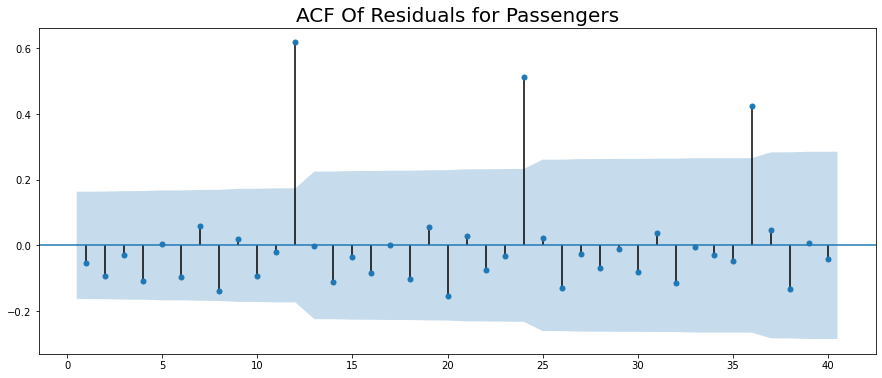

In [36]:
sgt.plot_acf(df.ar_res_qty, zero = False, lags = 40)
plt.title("ACF Of Residuals for Passengers",size=20)
plt.show()

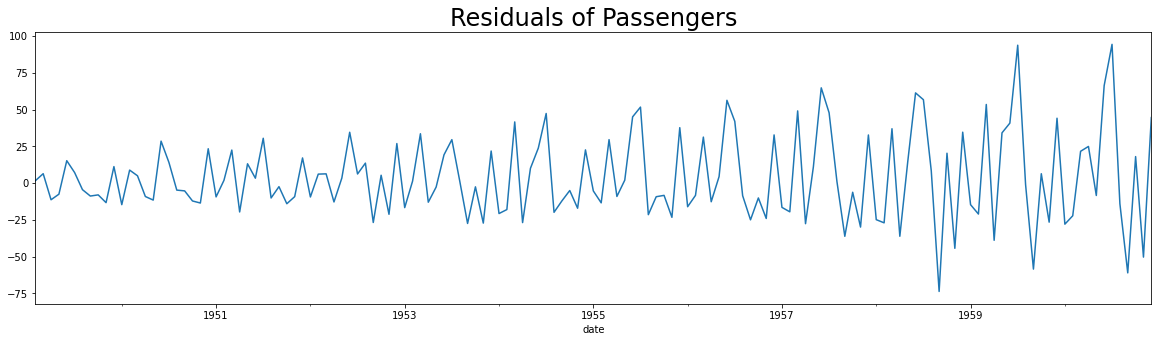

In [37]:
df.ar_res_qty[1:].plot(figsize=(20,5))
plt.title("Residuals of Passengers",size=24)
plt.show()

# Basic MA model

In [38]:
warnings.filterwarnings("ignore")

model_ma_1 = ARMA(final_data.Passengers, order=(1,0))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -711.090
Method:                       css-mle   S.D. of innovations             33.446
Date:                Wed, 12 May 2021   AIC                           1428.179
Time:                        16:53:54   BIC                           1437.089
Sample:                    01-01-1949   HQIC                          1431.800
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              278.0218     67.025      4.148      0.000     146.655     409.388
ar.L1.Passengers     0.9646      0.021     45.139      0.000       0.923       1.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0367           +0.0000j            1.0367            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
model_ma_2 = ARMA(final_data.Passengers, order=(2,0))
results_ma_2 = model_ma_2.fit()
print(results_ma_2.summary())

print("\nLLR test p-value = " + str(LLR_test(model_ar_1, model_ar_2)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 0)   Log Likelihood                -702.819
Method:                       css-mle   S.D. of innovations             31.558
Date:                Wed, 12 May 2021   AIC                           1413.639
Time:                        16:53:55   BIC                           1425.518
Sample:                    01-01-1949   HQIC                          1418.466
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              280.5022     49.382      5.680      0.000     183.716     377.289
ar.L1.Passengers     1.2831      0.079     16.331      0.000       1.129       1.437
ar.L2.Passengers    -0.3322 

In [40]:
model_ma_3 = ARMA(final_data.Passengers, order=(3,0))
results_ma_3 = model_ma_3.fit()
print(results_ma_3.summary())

print("\nLLR test p-value = " + str(LLR_test(model_ar_2, model_ar_3)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(3, 0)   Log Likelihood                -700.171
Method:                       css-mle   S.D. of innovations             30.965
Date:                Wed, 12 May 2021   AIC                           1410.342
Time:                        16:53:56   BIC                           1425.191
Sample:                    01-01-1949   HQIC                          1416.376
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              281.8887     60.380      4.669      0.000     163.545     400.232
ar.L1.Passengers     1.3531      0.083     16.339      0.000       1.191       1.515
ar.L2.Passengers    -0.5877 

In [41]:
model_ma_4 = ARMA(final_data.Passengers, order=(4,0))
results_ma_4 = model_ma_4.fit()
print(results_ma_4.summary())

print("\nLLR test p-value = " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(4, 0)   Log Likelihood                -698.879
Method:                       css-mle   S.D. of innovations             30.674
Date:                Wed, 12 May 2021   AIC                           1409.758
Time:                        16:53:56   BIC                           1427.577
Sample:                    01-01-1949   HQIC                          1416.998
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              283.2214     69.975      4.047      0.000     146.073     420.369
ar.L1.Passengers     1.3284      0.083     15.932      0.000       1.165       1.492
ar.L2.Passengers    -0.5080 

####  Analysing the Residuals for MA model

In [42]:
df['ma_res_qty'] = results_ma_3.resid

In [43]:
df.ma_res_qty.mean()

0.6604349467227373

In [44]:
df.ma_res_qty.var()

1155.0020629132794

In [45]:
ma_3= sts.adfuller(df.ma_res_qty)
print('ADF Statistic: %f' % ma_3[0])
print('p-value: %f' % ma_3[1])
print('Critical Values:')
for key, value in ma_3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.619766
p-value: 0.866453
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


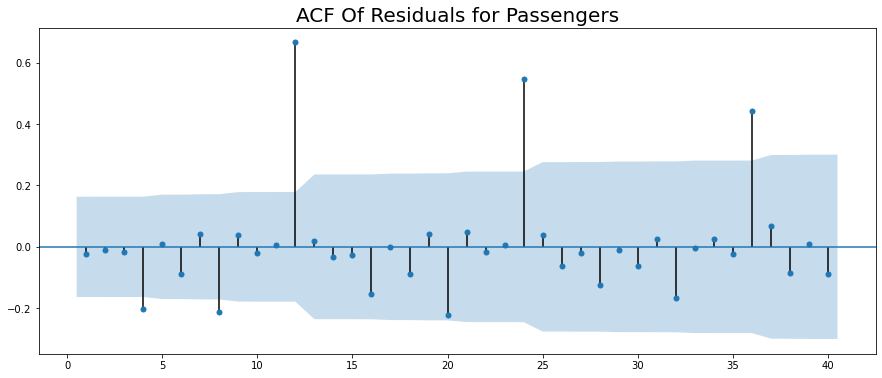

In [46]:
sgt.plot_acf(df.ma_res_qty, zero = False, lags = 40)
plt.title("ACF Of Residuals for Passengers",size=20)
plt.show()

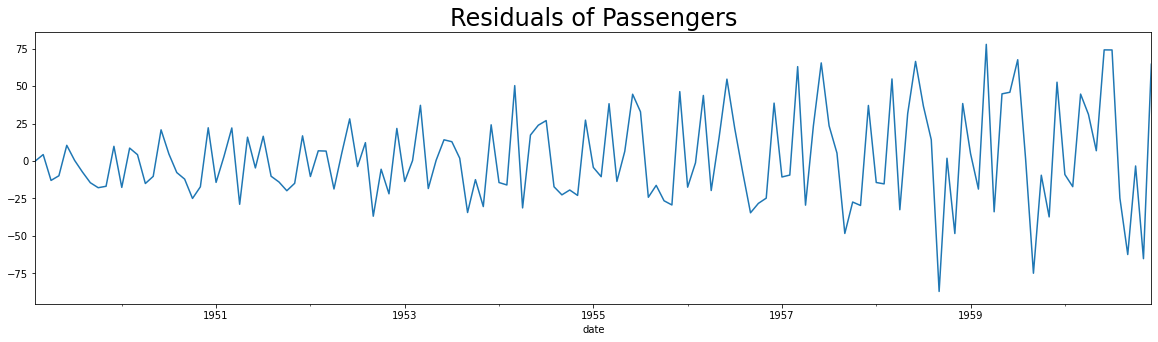

In [47]:
df.ma_res_qty[1:].plot(figsize=(20,5))
plt.title("Residuals of Passengers",size=24)
plt.show()

# Basic Arima

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model_ar_1_i_1_ma_1 = ARIMA(final_data.Passengers, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Wed, 12 May 2021   AIC                           1402.145
Time:                        16:53:59   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

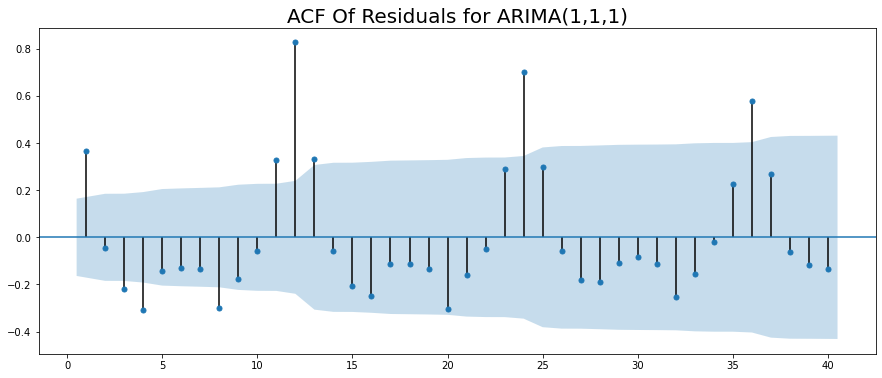

In [49]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

In [50]:
warnings.filterwarnings("ignore")
model_ar_1_i_1_ma_2 = ARIMA(final_data.Passengers, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(final_data.Passengers, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(final_data.Passengers, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_2_i_1_ma_2 = ARIMA(final_data.Passengers, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
model_ar_3_i_1_ma_1 = ARIMA(final_data.Passengers, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(final_data.Passengers, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
model_ar_4_i_1_ma_2 = ARIMA(final_data.Passengers, order=(4,1,2))
results_ar_4_i_1_ma_2 = model_ar_4_i_1_ma_2.fit()

In [51]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(2,1,2):  \t LL = ", results_ar_2_i_1_ma_2.llf, "\t AIC = ", results_ar_2_i_1_ma_2.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)
print("ARIMA(4,1,2):  \t LL = ", results_ar_4_i_1_ma_2.llf, "\t AIC = ", results_ar_4_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -697.0726999010277 	 AIC =  1402.1453998020554
ARIMA(1,1,2):  	 LL =  -680.9076869547627 	 AIC =  1371.8153739095253
ARIMA(1,1,3):  	 LL =  -680.5378511037441 	 AIC =  1373.0757022074881
ARIMA(2,1,1):  	 LL =  -675.8479050920762 	 AIC =  1361.6958101841524
ARIMA(2,1,2):  	 LL =  -666.0216953606307 	 AIC =  1344.0433907212614
ARIMA(3,1,1):  	 LL =  -675.2255025402839 	 AIC =  1362.4510050805677
ARIMA(3,1,2):  	 LL =  -673.3748017162338 	 AIC =  1360.7496034324677
ARIMA(4,1,2):  	 LL =  -670.075446141273 	 AIC =  1356.150892282546


In [52]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_2)))


LLR test p-value = 0.0


In [53]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_4_i_1_ma_2, DF = 4)))


LLR test p-value = 0.0


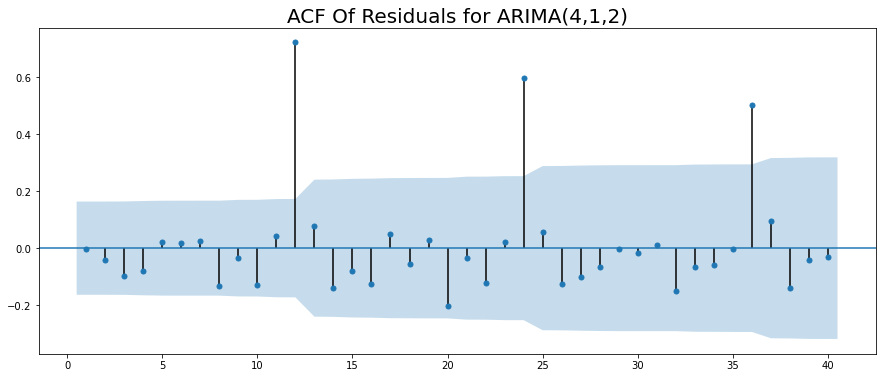

In [54]:
df['res_ar_4_i_1_ma_2'] = results_ar_4_i_1_ma_2.resid
sgt.plot_acf(df.res_ar_4_i_1_ma_2[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(4,1,2)", size=20)
plt.show()

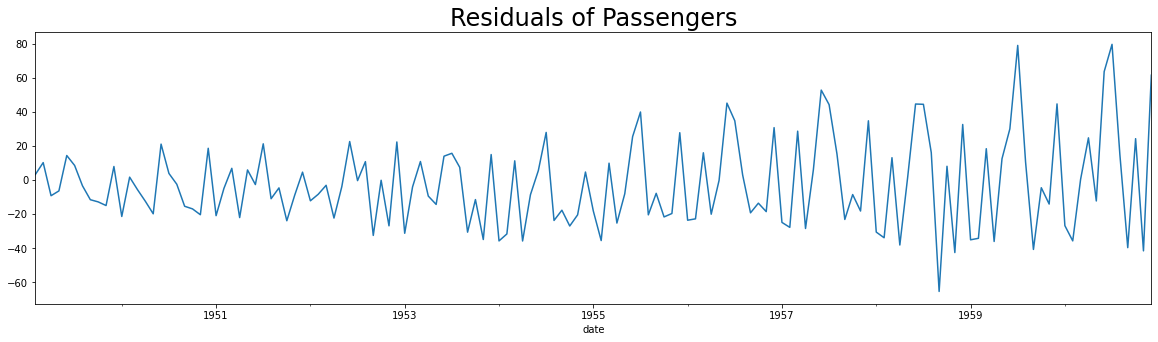

In [55]:
df.res_ar_4_i_1_ma_2[1:].plot(figsize=(20,5))
plt.title("Residuals of Passengers",size=24)
plt.show()

In [56]:
adf_412= sts.adfuller(df.res_ar_4_i_1_ma_2[1:])
print('ADF Statistic: %f' % adf_412[0])
print('p-value: %f' % adf_412[1])
print('Critical Values:')
for key, value in adf_412[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.975860
p-value: 0.761967
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


In [57]:
warnings.filterwarnings("ignore")


train = final_data.iloc[:len(final_data)-12]
test = final_data.iloc[len(final_data)-12:] 
  
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
best_arima = ARIMA(train['Passengers'], 
                order = (4, 1, 2))
  
result_arima = best_arima.fit()
result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -602.619
Method:                       css-mle   S.D. of innovations             23.556
Date:                Wed, 12 May 2021   AIC                           1221.237
Time:                        16:54:03   BIC                           1244.239
Sample:                    02-01-1949   HQIC                          1230.584
                         - 12-01-1959                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5901      0.114     22.763      0.000       2.367       2.813
ar.L1.D.Passengers     0.1773      0.094      1.894      0.058      -0.006       0.361
ar.L2.D.Passengers     0.4091      0.099      4.125      0.000       0.215       0.604
ar.L3.D.Passengers    -0.2667      0.094     -2.852      0.004      -0.450      -0.083
ar.L4.D.Passengers    -0.2417      0.088     -2.739      0.006      -0.415      -0.069
ma.L1.D.Passengers    -0.0680      0.064     -1.060      0.289      -0.194       0.058
ma.L2.D.Passengers    -0.9320      0.062    -14.913      0.000      -1.054      -0.809
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9739           -0.7489j            1.2285           -0.1043
AR.2            0.9739           +0.7489j            1.2285            0.1043
AR.3           -1.5256           -0.6431j            1.6556           -0.4365
AR.4           -1.5256           +0.6431j            1.6556            0.4365
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0730           +0.0000j            1.0730            0.5000
-----------------------------------------------------------------------------
"""

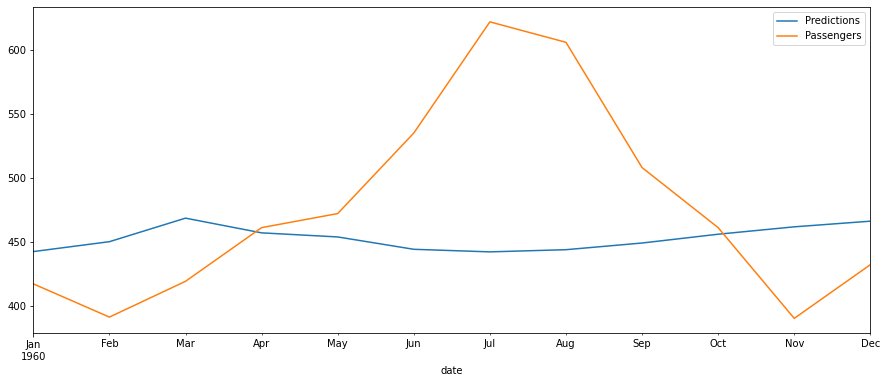

In [58]:
start = len(train)
end = len(train) + len(test) - 1
  
predictions = result_arima.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

# Auto ARIMA

In [59]:
from pmdarima.arima import auto_arima

stepwise_model = auto_arima(final_data, start_p=1, start_q=1,
                           max_p=6, max_q=6, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, random_state=0
                           )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.26 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.51 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.76 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [60]:
stepwise_model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [61]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 12 May 2021   AIC                           1019.178
Time:                                     16:54:19   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.944      0.000      -0.507      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1910      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4481     15.527      8.402      0.000     100.017     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

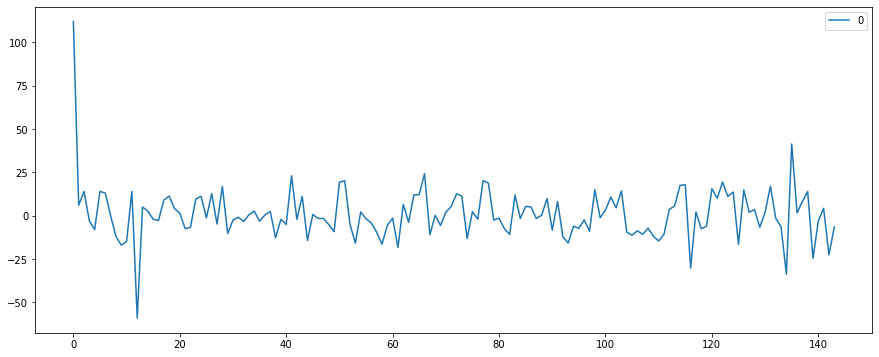

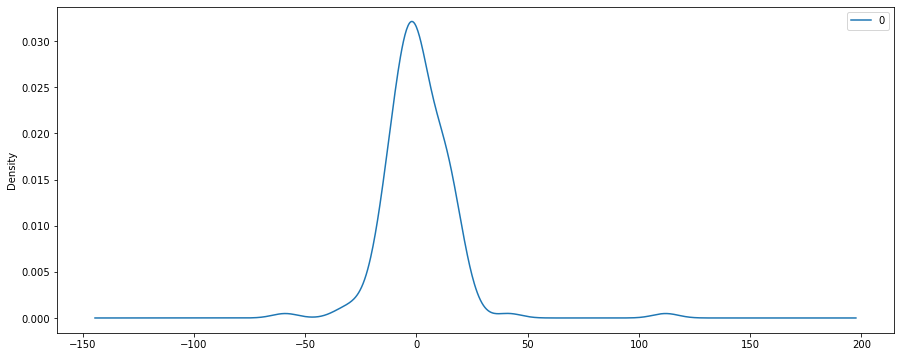

                0
count  144.000000
mean     0.794913
std     15.556545
min    -59.002292
25%     -7.230788
50%     -1.232642
75%      9.639061
max    112.000000


In [62]:
# plot residual errors
residuals = pd.DataFrame(stepwise_model.resid())
residuals.plot()
plt.show()   

residuals.plot(kind='kde')
plt.show()
print(residuals.describe()) # almost like normal ditribution

In [63]:
warnings.filterwarnings("ignore")

train = final_data.iloc[:len(final_data)-12]
test = final_data.iloc[len(final_data)-12:] 
  
# Fit the best model
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
best_sarima_model = SARIMAX(train['Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
  
result_best_sarima = best_sarima_model.fit()
result_best_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Wed, 12 May 2021   AIC                            896.024
Time:                                    16:54:22   BIC                            909.920
Sample:                                01-01-1949   HQIC                           901.667
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.077     -3.876      0.000      -0.449      -0.148
ar.S.L12       0.7104      0.215      3.305      0.001       0.289       1.132
ar.S.L24       0.2889      0.100      2.881      0.004       0.092       0.485
ma.S.L12      -0.9817      2.161     -0.454      0.650      -5.217       3.253
sigma2        88.1693    173.998      0.507      0.612    -252.860     429.199
===================================================================================
Ljung-Box (Q):                       38.24   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.55   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

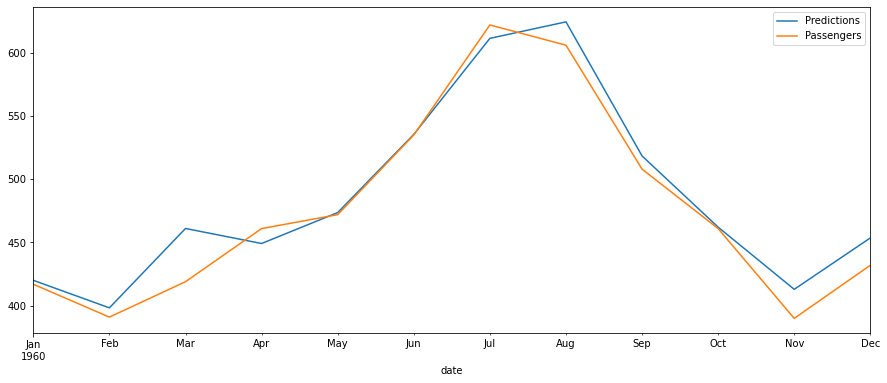

In [64]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result_best_sarima.predict(start, end, typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

In [65]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
print('rmse value: ', rmse(test["Passengers"], predictions))
print('mse value: ' ,mean_squared_error(test["Passengers"], predictions))

rmse value:  17.15912716973274
mse value:  294.4356452270603


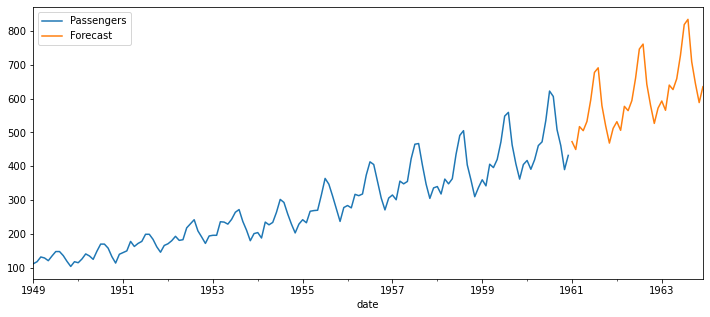

In [66]:
forecast = result_best_sarima.predict(start = len(final_data), 
                          end = (len(final_data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
final_data['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)